In [7]:
import os
import numpy as np
from tqdm import tqdm
import pandas as pd
from deepface import DeepFace
import struct
import cv2

cascPath = "C:/Users/Owner/PycharmProjects/pythonProject/haarcascade_frontalface_default.xml"
face_cascade = cv2.CascadeClassifier(cascPath)
path = "C:/Users/Owner/PycharmProjects/pythonProject/target/"
name = 'customercamera'
cap = cv2.VideoCapture(0)
k = 0
count = 0
while True:
    ret, frame = cap.read()
    frame = cv2.resize(frame, (1360, 768))
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    # Check if any face is detected
    if len(faces) > 0:
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            save_path = path +name+ '.jpg'
            cv2.imwrite('% s.jpg' % (save_path), frame)
            count = count + 1
        # Display the resulting frame
        cv2.imshow('Video', frame)
        k = k + 1

        if k == 2:
            break

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

#### In above code, I am trying to capture a photo of a person using opencv-python library(cv2). Also the photo is only captured when face is detected! The path is defined and photo name is also defiened "customercamera" so when photo is saved, it is saved at specific target location provided with respected name. This is necessary in order to verify face.

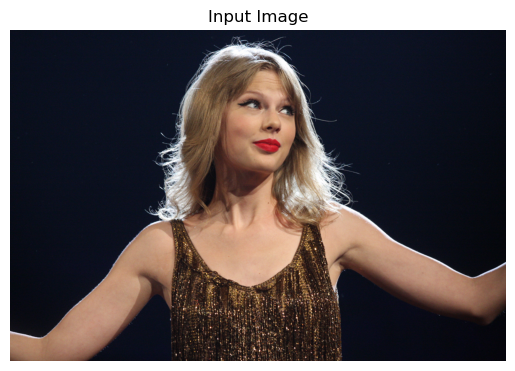

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.10it/s]


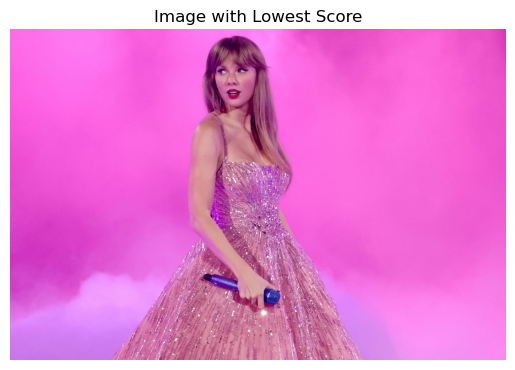

The score of the image with the lowest score is: 8.800301447479194
The highest score among the distances is: 13.419860247919027


In [9]:
import cv2
import numpy as np
import os
from tqdm import tqdm
import pandas as pd
from deepface import DeepFace
from matplotlib import pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Directory containing images
images_directory = 'C:/Users/Owner/PycharmProjects/pythonProject/faces/'

# Extract target features
target_img_path = 'C:/Users/Owner/PycharmProjects/pythonProject/target/ts.jpg'
target_embedding = DeepFace.represent(img_path=target_img_path, model_name="SFace", enforce_detection=False)[0]["embedding"]

# Load the input image
input_img = cv2.imread(target_img_path)
input_img_rgb = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)

# Display the input image
plt.imshow(input_img_rgb)
plt.title("Input Image")
plt.axis('off')
plt.show()

# Create a list to store instances
instances = []

# Iterate over images in the directory
for img_name in tqdm(os.listdir(images_directory)):
    # Full path to the image
    img_path = os.path.join(images_directory, img_name)

    try:
        # Extract embedding for the current image
        embedding = DeepFace.represent(img_path=img_path, model_name="SFace", enforce_detection=False)[0]["embedding"]

        # Calculate Euclidean distance
        distance = np.linalg.norm(np.array(embedding) - np.array(target_embedding), axis=None)

        # Create an instance dictionary
        instance = {'img_name': img_path, 'embedding': embedding, 'distance': distance}
        instances.append(instance)
    except Exception as e:
        print(f"Error processing image {img_name}: {e}")

# Convert instances to a DataFrame
df = pd.DataFrame(instances)

# Check if DataFrame is not empty before attempting to find the minimum distance
if not df.empty:
    # Find the row with the minimum distance
    min_distance_row = df.loc[df['distance'].idxmin()]

    # Load the image with the lowest score
    min_distance_img = cv2.imread(min_distance_row['img_name'])

    # Convert from BGR to RGB
    min_distance_img_rgb = cv2.cvtColor(min_distance_img, cv2.COLOR_BGR2RGB)

    # Display the image with the lowest score
    plt.imshow(min_distance_img_rgb)
    plt.title("Image with Lowest Score")
    plt.axis('off')
    plt.show()

    # Retrieve and print the score
    min_score = min_distance_row['distance']
    print(f"The score of the image with the lowest score is: {min_score}")
else:
    print("Error: DataFrame is empty.")
    
    
# Find the highest score (maximum distance)
max_score = df['distance'].max()
print(f"The highest score among the distances is: {max_score}")


#### In the above code I am trying to find match of captured photo above "customercamera.jpg" present in target folder , with other photos present in "faces" folder. every line of coding is explained above with comment. It checks with all the photos in faces folder and shows the output of image that matches with lowest score. The highest score is something that it matches with all the faces(images) in folder and whichever is the least match has the highest score and that is printed. There are various models available that can be used for embedding like facenet, vgg, sface but I chose to use sface because it worked well in many cases like when face painting is there and face without face painting, when person has glasses on while the same person without glasses, when the person has beard while the person without beard, when the person has mask on while the person without mask. It can find with lowest score when same person is found in "faces" folder.